In [1]:
#imports
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#5.1
class MyMLP(nn.Module):
    def __init__(self, num_input_features, num_hidden_neuron1, num_hidden_neuron2, num_output_neurons):
        super(MyMLP, self).__init__()
        self.hidden_layer1 = nn.Linear(num_input_features, num_hidden_neuron1)
        self.hidden_layer2 = nn.Linear(num_hidden_neuron1, num_hidden_neuron2)
        self.output_layer = nn.Linear(num_hidden_neuron2, num_output_neurons)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, X):
        X = torch.tensor(X, dtype=torch.float)
        hidden_res1 = self.relu(self.hidden_layer1(X))
        hidden_res2 = self.relu(self.hidden_layer2(hidden_res1))
        output = self.sigmoid(self.output_layer(hidden_res2))
        return output

In [3]:
#Dataset
class PrincessDataset(Dataset):
    def __init__(self,dataName):
        #dataloading
        xy = np.loadtxt(dataName, delimiter=',', dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[0:, :-1])
        self.y = torch.from_numpy(xy[:,-1])
        self.n_samples = xy.shape[0]
    def __getitem__(self, index):
        return self.x[index] , self.y[index]
    def __len__(self):
        return self.n_samples

In [5]:
torch.manual_seed(200401093)
batch_size = 16
num_workers = 0
test_data = PrincessDataset('cure_the_princess_test.csv')
train_data = PrincessDataset('cure_the_princess_train.csv')
validation_data = PrincessDataset('cure_the_princess_validation.csv')

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_78092\1829612099.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float)


Epoch 0 Training loss 0.6757189940802658 Validation Loss : 0.5718436926603317
Epoch 1 Training loss 0.5572460886043838 Validation Loss : 0.5011681318283081
Epoch 2 Training loss 0.5049623684792579 Validation Loss : 0.45677351504564284
Epoch 3 Training loss 0.4715065265758128 Validation Loss : 0.4335633099079132
Epoch 4 Training loss 0.4460999607285367 Validation Loss : 0.4044843003153801
Epoch 5 Training loss 0.41655266134044794 Validation Loss : 0.38189062774181365
Epoch 6 Training loss 0.3967236602985406 Validation Loss : 0.3503610759973526
Epoch 7 Training loss 0.37941018067583254 Validation Loss : 0.3388355582952499
Epoch 8 Training loss 0.36563346035118344 Validation Loss : 0.31814998015761375
Epoch 9 Training loss 0.35163559830641444 Validation Loss : 0.31024840995669367
Epoch 10 Training loss 0.34683624909648414 Validation Loss : 0.30554336607456206
Epoch 11 Training loss 0.3323016479800019 Validation Loss : 0.29483282268047334
Epoch 12 Training loss 0.3222536836055261 Validatio

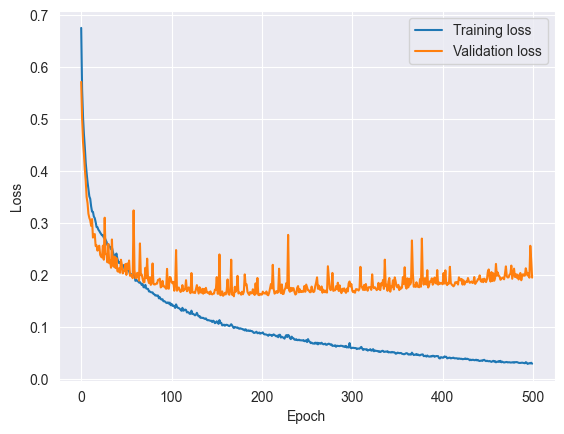

In [20]:
#5.2
#class parameters
num_input_features = 13
num_hidden_neuron1 = 100
num_hidden_neuron2 = 50
num_output_neuron = 1 #binary classification
####
num_epochs = 500
learning_rate = 0.001
###
model = MyMLP(num_input_features,num_hidden_neuron1, num_hidden_neuron2,num_output_neuron)

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
list_train_loss, list_val_loss = [], []
for epoch in range(num_epochs):
    train_loss = 0.0
    train_count = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        train_count += 1.0
        train_loss += loss.item()

    validation_loss = 0.0
    with torch.no_grad():
        model.eval()
        for inputs, labels in validation_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            validation_loss += loss.item()

    model.train()

    train_loss /= train_count
    validation_loss /= len(validation_loader)
    print("Epoch", epoch, "Training loss", train_loss,"Validation Loss :",validation_loss)

    list_train_loss.append(train_loss)
    list_val_loss.append(validation_loss)
                   

sns.set_style("darkgrid")
plt.plot(list_train_loss, label="Training loss")
plt.plot(list_val_loss, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_78092\1829612099.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float)


Epoch 0 Training loss 0.7037829205959658 Validation Loss : 0.6649103373289108
Epoch 1 Training loss 0.6357069524783122 Validation Loss : 0.6231005862355232
Epoch 2 Training loss 0.59729102593434 Validation Loss : 0.5731292054057121
Epoch 3 Training loss 0.5629880209512348 Validation Loss : 0.5411452665925026
Epoch 4 Training loss 0.5395461592493178 Validation Loss : 0.5559614136815071
0.5411452665925026  <  0.5559614136815071
EARLY STOPPING COUNT :  1
Epoch 5 Training loss 0.5097568842429149 Validation Loss : 0.5022651195526123
Epoch 6 Training loss 0.48970280946055544 Validation Loss : 0.4650340095162392
Epoch 7 Training loss 0.46361214790163163 Validation Loss : 0.4287189319729805
Epoch 8 Training loss 0.44321865597857707 Validation Loss : 0.40951210260391235
Epoch 9 Training loss 0.4289390948377078 Validation Loss : 0.38624441623687744
Epoch 10 Training loss 0.4104431028230281 Validation Loss : 0.36743120700120924
Epoch 11 Training loss 0.39607175260405 Validation Loss : 0.373915638

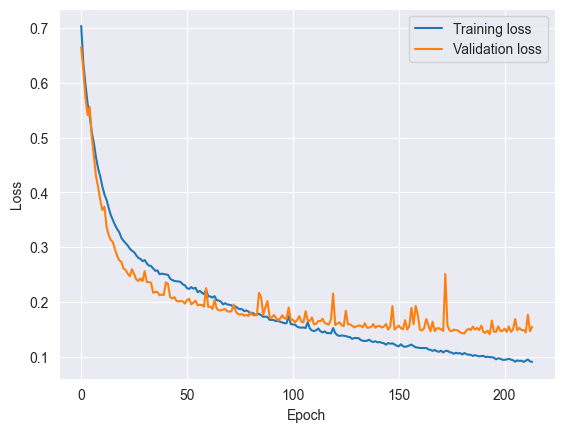

In [24]:
#5.3
num_input_features = 13
num_hidden_neuron1 = 100
num_hidden_neuron2 = 50
num_output_neuron = 1 #binary classification
####
num_epochs = 500
learning_rate = 0.001
patience = 20
patience_counter = 0
###
model = MyMLP(num_input_features,num_hidden_neuron1, num_hidden_neuron2,num_output_neuron)

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
list_train_loss, list_val_loss = [], []
best_validation_loss = None
for epoch in range(num_epochs):

    train_loss = 0.0
    train_count = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        train_count += 1.0
        train_loss += loss.item()

    validation_loss = 0.0
    with torch.no_grad():
        model.eval()
        for inputs, labels in validation_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            validation_loss += loss.item()

    model.train()

    train_loss /= train_count
    validation_loss /= len(validation_loader)
    print("Epoch", epoch, "Training loss", train_loss,"Validation Loss :",validation_loss)

    list_train_loss.append(train_loss)
    list_val_loss.append(validation_loss)
    
    if best_validation_loss is None:
        best_validation_loss = validation_loss
        torch.save(model.state_dict(), "bestval.pt")
    elif best_validation_loss < validation_loss:
        patience_counter += 1
        print(best_validation_loss, " < ",validation_loss)
        print("EARLY STOPPING COUNT : ",patience_counter)
        if(patience_counter == patience):
            break;
    else:
        best_validation_loss = validation_loss
        torch.save(model.state_dict(), "bestval.pt")
        patience_counter = 0
                   

sns.set_style("darkgrid")
plt.plot(list_train_loss, label="Training loss")
plt.plot(list_val_loss, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [1]:
model = MyMLP(num_input_features, num_hidden_neuron1, num_hidden_neuron2, num_output_neuron)
model.load_state_dict(torch.load('bestval.pt'))
model.eval()
# cpu Time to memorize the dataset: 45.89176678657532
# gpu Time to memorize the dataset: 43.89599013328552
predicts = []
real_labels = []

n_correct = 0
n_samples = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predict = outputs > 0.5
        n_samples += labels.size(0)
        predicts.extend(predict.int().tolist())
        real_labels.extend(labels.int().tolist())

from sklearn.metrics import f1_score, accuracy_score, classification_report

print("Accuracy score of this model: {}".format(accuracy_score(real_labels, predicts)))
print(classification_report(real_labels, predicts))

NameError: name 'MyMLP' is not defined

In [ ]:
#5.4 colab'da çalıştırdım
#class parameters
num_input_features = 13
num_hidden_neuron1 = 100
num_hidden_neuron2 = 50
num_output_neuron = 1 #binary classification
####
num_epochs = 500
learning_rate = 0.001
###

start_time = time.time()

model = MyMLP(num_input_features,num_hidden_neuron1, num_hidden_neuron2,num_output_neuron)
model = model.to("cuda") # model works on gpu

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
list_train_loss, list_val_loss = [], []
for epoch in range(num_epochs):
    train_loss = 0.0
    train_count = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to("cuda"), labels.to("cuda")
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        train_count += 1.0
        train_loss += loss.item()

    validation_loss = 0.0
    with torch.no_grad():
        model.eval()
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to("cuda"), labels.to("cuda")
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            validation_loss += loss.item()

    model.train()

    train_loss /= train_count
    validation_loss /= len(validation_loader)
    print("Epoch", epoch, "Training loss", train_loss,"Validation Loss :",validation_loss)

    list_train_loss.append(train_loss)
    list_val_loss.append(validation_loss)
                   

sns.set_style("darkgrid")
plt.plot(list_train_loss, label="Training loss")
plt.plot(list_val_loss, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
end_time = time.time()
print(f"Time to memorize the dataset: {end_time - start_time}")

# works on GPU execute time : 279.3683476448059
# works on CPU execute time : 282.12509512901306

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_78092\1829612099.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float)


Epoch 0 Training loss 0.6472434937199459 Validation Loss : 0.5943515032529831
Epoch 1 Training loss 0.5923458673531496 Validation Loss : 0.5577365458011627
Epoch 2 Training loss 0.5607253045220918 Validation Loss : 0.5415608406066894
Epoch 3 Training loss 0.5336792921718163 Validation Loss : 0.4970086708664894
Epoch 4 Training loss 0.5078863988194284 Validation Loss : 0.47380666732788085
Epoch 5 Training loss 0.4870886353752281 Validation Loss : 0.45506865382194517
Epoch 6 Training loss 0.47082686235633076 Validation Loss : 0.43563744723796843
Epoch 7 Training loss 0.455200177959249 Validation Loss : 0.42039629220962527
Epoch 8 Training loss 0.43518667375739617 Validation Loss : 0.39454150944948196
Epoch 9 Training loss 0.42494232707385776 Validation Loss : 0.37912689298391344
Epoch 10 Training loss 0.40815213605572903 Validation Loss : 0.3708108842372894
Epoch 11 Training loss 0.3970888649361043 Validation Loss : 0.3748533010482788
0.3708108842372894  <  0.3748533010482788
EARLY STOPP

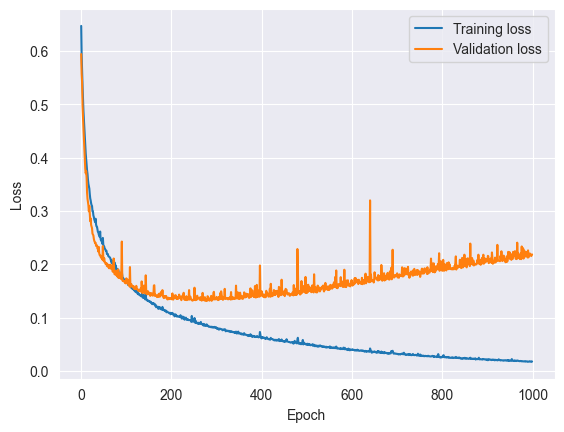

In [18]:
#5.5
num_input_features = 13
num_hidden_neuron1 = 100
num_hidden_neuron2 = 50
num_output_neuron = 1 #binary classification
####
num_epochs = 1000
learning_rate = 7e-4
patience = -1
patience_counter = 0
###
model = MyMLP(num_input_features,num_hidden_neuron1, num_hidden_neuron2,num_output_neuron)

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
list_train_loss, list_val_loss = [], []
best_validation_loss = None
for epoch in range(num_epochs):

    train_loss = 0.0
    train_count = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        train_count += 1.0
        train_loss += loss.item()

    validation_loss = 0.0
    with torch.no_grad():
        model.eval()
        for inputs, labels in validation_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            validation_loss += loss.item()

    model.train()

    train_loss /= train_count
    validation_loss /= len(validation_loader)
    print("Epoch", epoch, "Training loss", train_loss,"Validation Loss :",validation_loss)

    list_train_loss.append(train_loss)
    list_val_loss.append(validation_loss)
    
    if best_validation_loss is None:
        best_validation_loss = validation_loss
        torch.save(model.state_dict(), "bestval.pt")
    elif best_validation_loss < validation_loss:
        patience_counter += 1
        print(best_validation_loss, " < ",validation_loss)
        print("EARLY STOPPING COUNT : ",patience_counter)
        if(patience_counter == patience):
            break;
    else:
        best_validation_loss = validation_loss
        torch.save(model.state_dict(), "bestval.pt")
        patience_counter = 0
                   

sns.set_style("darkgrid")
plt.plot(list_train_loss, label="Training loss")
plt.plot(list_val_loss, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [1]:
#5.3
num_input_features = 13
num_hidden_neuron1 = 100
num_hidden_neuron2 = 50
num_output_neuron = 1 #binary classification
####
num_epochs = 500
learning_rate = 0.001
patience = 20
patience_counter = 0
###
model = MyMLP(num_input_features,num_hidden_neuron1, num_hidden_neuron2,num_output_neuron)

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.1)
list_train_loss, list_val_loss = [], []
best_validation_loss = None
for epoch in range(num_epochs):

    train_loss = 0.0
    train_count = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        train_count += 1.0
        train_loss += loss.item()

    validation_loss = 0.0
    with torch.no_grad():
        model.eval()
        for inputs, labels in validation_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            validation_loss += loss.item()

    model.train()

    train_loss /= train_count
    validation_loss /= len(validation_loader)
    print("Epoch", epoch, "Training loss", train_loss,"Validation Loss :",validation_loss)

    list_train_loss.append(train_loss)
    list_val_loss.append(validation_loss)
    
    if best_validation_loss is None:
        best_validation_loss = validation_loss
        torch.save(model.state_dict(), "bestval.pt")
    elif best_validation_loss < validation_loss:
        patience_counter += 1
        print(best_validation_loss, " < ",validation_loss)
        print("EARLY STOPPING COUNT : ",patience_counter)
        if(patience_counter == patience):
            break;
    else:
        best_validation_loss = validation_loss
        torch.save(model.state_dict(), "bestval.pt")
        patience_counter = 0
                   

sns.set_style("darkgrid")
plt.plot(list_train_loss, label="Training loss")
plt.plot(list_val_loss, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

NameError: name 'MyMLP' is not defined